<a href="https://colab.research.google.com/github/vitor1209/analiseVendaLojas/blob/main/Analise_VendaLojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Definição do Problema:**
Qual a questão a ser resolvida? O que esperamos descobrir com a análise?

  1. *O tipo de serviço de envio escolhido realmente tem um impacto no dia da entrega?*
  2. *A estação do ano influencia no número de bicicletas alugadas?*
  3. *Quais são os dias da semana com maior número de aluguéis?*



# Importaçao das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vitor1209/analiseVendaLojas/refs/heads/main/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


1. **Row ID**: Número único para cada linha do registro.
2. **Order ID**: Código de identificação do pedido.
3. **Order Date**: Data em que o pedido foi realizado.
4. **Ship Date**: Data em que o pedido foi enviado.
5. **Ship Mode**: Tipo de serviço de envio escolhido.

    Second Class: Envio mais econômico, com um tempo de entrega mais longo, adequado para pedidos menos urgentes.

    Standard Class: Serviço de envio regular, equilibrando custo e tempo de entrega, com uma velocidade moderada.

    First Class: Envio rápido, com uma entrega mais ágil, porém com um custo maior em comparação com os serviços econômicos.
    
    Same Day: O envio mais rápido possível, garantindo a entrega no mesmo dia da compra, com custo elevado.


6. **Customer ID**: Identificação única do cliente.
7. **Customer Name**: Nome do cliente que fez o pedido.
8. **Segment**: Categoria do tipo de cliente (consumidor ou empresa).
9. **Country**: País do cliente.
10. **City**: Cidade onde o cliente reside.
11. **State**: Estado de residência do cliente.
12. **Postal Code**: Código postal da região do cliente.
13. **Region**: Grande área geográfica do cliente.
14. **Product ID**: Identificação única do produto.
15. **Category**: Categoria à qual o produto pertence.
16. **Sub-Category**: Subcategoria dentro da categoria do produto.
17. **Product Name**: Nome específico do produto comprado.
18. **Sales**: Valor total pago pelo produto.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### 11 dados nulos em Postal code

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## Delatar as colunas que não diz nada sobre o produto

In [ ]:
df.drop(['Row ID' , 'Customer ID' , 'Product ID' , 'Order ID'] , axis=1 , inplace=True)

In [ ]:
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


## ver as linhas que estao sem seu codigo postal

In [ ]:
df[df['Postal Code'].isnull()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


### Todas elas são da mesma cidade e temo mesmo codigo postal
### Então pesquisei qual o codigo postal de Burlington, que e 5401 e assim preenchi esses dados nulos


In [ ]:
df['Postal Code'].fillna(5401,inplace=True)

<ipython-input-9-4a7259584533>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(5401,inplace=True)


### Meu DataFrame agora esta sem nenhum falor nulo

In [ ]:
df.isnull().sum()

,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer Name,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0


### Minhas data estão como obejeto o que não posso realizar operações com elas

#### Então transformei em dado numerico, e converti os anos e meses em dias para poder calcular a quantidade de dias que teve, deste o pedido do produto até seu recebimento

In [ ]:
def calcular_diferenca(coluna):
    data_formatada = datetime.strptime(coluna, "%d/%m/%Y")

    dia = data_formatada.day
    mes = data_formatada.month
    ano = data_formatada.year

    ano = ano * 365
    mes = mes * 30
    dia = dia - 30
    return ano + mes + dia

### Nova coluna criada com essa diferencia de dias

In [ ]:
envio = df['Order Date'].apply(calcular_diferenca)
rec = df['Ship Date'].apply(calcular_diferenca)

df['Dias Entrega'] = rec - envio

In [ ]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Dias Entrega
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4


### Todo meu DataFrame tem apenas um país, então uma coluna com sempre o mesmo valor, não me diz muito sobre o seu dados, então deletei essa coluna

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df.drop(['Country'] , axis=1 , inplace=True)

In [ ]:
df.describe()

,Postal Code,Sales,Dias Entrega
count,9800.000000,9800.000000,9800.000000
mean,55217.343265,230.769059,3.971735
std,32066.750532,626.651875,1.841543
min,1040.000000,0.444000,0.000000
25%,23223.000000,17.248000,3.000000
50%,57551.000000,54.490000,4.000000
75%,90008.000000,210.605000,5.000000
max,99301.000000,22638.480000,11.000000


## Vizualição de dados:

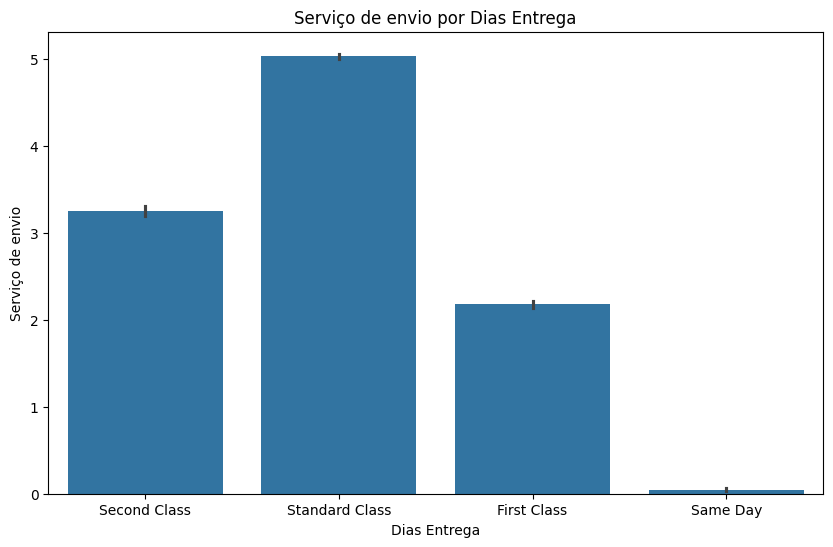

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ship Mode', y='Dias Entrega', data=df)
plt.title('Serviço de envio por Dias Entrega')
plt.xlabel('Dias Entrega')
plt.ylabel('Serviço de envio')
plt.show()

    Second Class: Envio mais econômico, com um tempo de entrega mais longo, adequado para pedidos menos urgentes.

    Standard Class: Serviço de envio regular, equilibrando custo e tempo de entrega, com uma velocidade moderada.

    First Class: Envio rápido, com uma entrega mais ágil, porém com um custo maior em comparação com os serviços econômicos.
    
    Same Day: O envio mais rápido possível, garantindo a entrega no mesmo dia da compra, com custo elevado.

###  A Second Class tem o envio mais barato, e com uma media de 3 dias para receber seu produto, enquanto o envio mais caro demora em media 2 a 3 dias paea receber sua compra

### O tipo de Standard Class, não compensa muito por não ser a opção mais barata, porem com a mais demorada para chegar seu produto

In [ ]:
# funcao para ver a media de uma coluna referente a outra
def mediana(banco , coluna , valorMedia):
    maiores = {}
    maior = 0.0
    nome = ''
    for i in sorted(banco[coluna].unique()):
        mediana = banco[banco[coluna] == i][valorMedia].median()
        print(f" o nome {i} têm a média de valor de: {mediana:.2f}")
        if maior < mediana:
            nome = i
            maior = mediana
            maiores[nome] = maior
        elif maior == mediana:
           maiores[i] = mediana

    print(f" o nome que têm a maior média e/são : {maiores}")

In [ ]:
mediana(df , 'City' , 'Dias Entrega')

 o nome Aberdeen têm a média de valor de: 3.00
 o nome Abilene têm a média de valor de: 2.00
 o nome Akron têm a média de valor de: 4.50
 o nome Albuquerque têm a média de valor de: 5.50
 o nome Alexandria têm a média de valor de: 5.00
 o nome Allen têm a média de valor de: 3.00
 o nome Allentown têm a média de valor de: 4.00
 o nome Altoona têm a média de valor de: 1.00
 o nome Amarillo têm a média de valor de: 3.50
 o nome Anaheim têm a média de valor de: 0.00
 o nome Andover têm a média de valor de: 3.00
 o nome Ann Arbor têm a média de valor de: 3.00
 o nome Antioch têm a média de valor de: 1.00
 o nome Apopka têm a média de valor de: 4.00
 o nome Apple Valley têm a média de valor de: 2.00
 o nome Appleton têm a média de valor de: 3.50
 o nome Arlington têm a média de valor de: 4.00
 o nome Arlington Heights têm a média de valor de: 4.00
 o nome Arvada têm a média de valor de: 2.00
 o nome Asheville têm a média de valor de: 5.00
 o nome Athens têm a média de valor de: 5.00
 o nome 

#### As cidades de: Beverly - Cottage Grove - Missoula, tem o maior tempo para a entrega com 8 dias.  todas essas cidades estão localizadas no norte dos Estados Unidos. Beverly e Cottage Grove estão no estado de Minnesota, enquanto Missoula está em Montana.

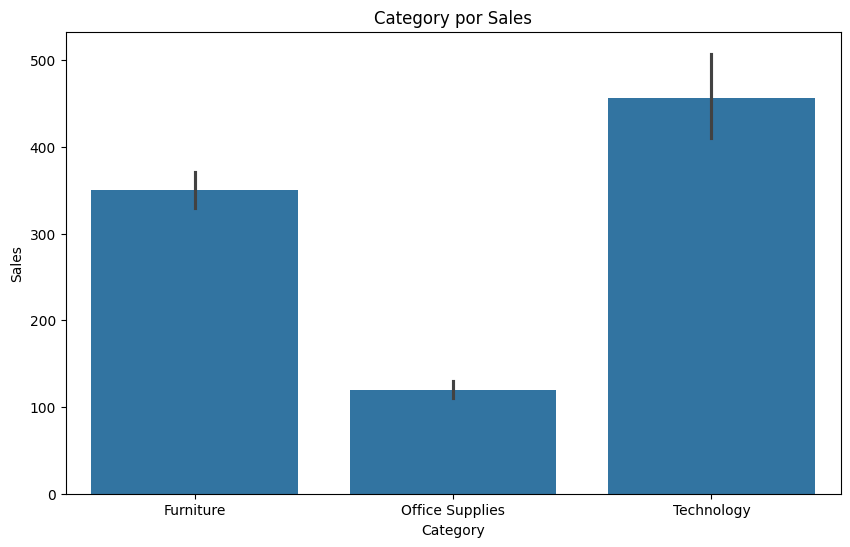

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Category por Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### A categoria com produtos mais caros e a categoria de produtos tecnologicos

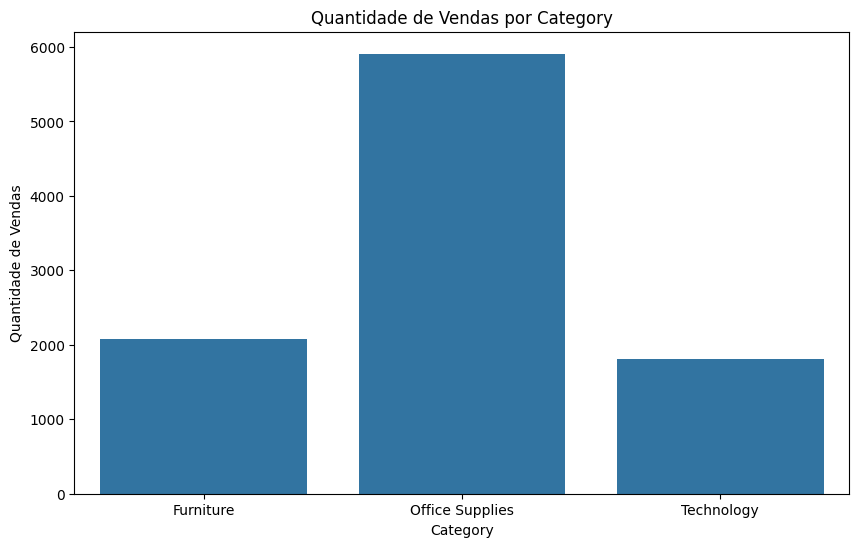

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df)
plt.title('Quantidade de Vendas por Category')
plt.xlabel('Category')
plt.ylabel('Quantidade de Vendas')
plt.show()

### E a categoria que mais vende e a de Office Supplies, e essa e a categoria com produtos mais barata

In [ ]:
mediana(df , 'State' , 'Sales')

 o nome Alabama têm a média de valor de: 70.98
 o nome Arizona têm a média de valor de: 62.35
 o nome Arkansas têm a média de valor de: 54.42
 o nome California têm a média de valor de: 61.04
 o nome Colorado têm a média de valor de: 52.42
 o nome Connecticut têm a média de valor de: 50.00
 o nome Delaware têm a média de valor de: 68.04
 o nome District of Columbia têm a média de valor de: 35.80
 o nome Florida têm a média de valor de: 41.47
 o nome Georgia têm a média de valor de: 67.88
 o nome Idaho têm a média de valor de: 89.97
 o nome Illinois têm a média de valor de: 35.86
 o nome Indiana têm a média de valor de: 75.88
 o nome Iowa têm a média de valor de: 37.44
 o nome Kansas têm a média de valor de: 63.98
 o nome Kentucky têm a média de valor de: 76.30
 o nome Louisiana têm a média de valor de: 56.30
 o nome Maine têm a média de valor de: 105.72
 o nome Maryland têm a média de valor de: 89.82
 o nome Massachusetts têm a média de valor de: 63.20
 o nome Michigan têm a média de v

In [ ]:
mediana(df , 'City' , 'Sales')

 o nome Aberdeen têm a média de valor de: 25.50
 o nome Abilene têm a média de valor de: 1.39
 o nome Akron têm a média de valor de: 48.77
 o nome Albuquerque têm a média de valor de: 104.53
 o nome Alexandria têm a média de valor de: 27.02
 o nome Allen têm a média de valor de: 18.71
 o nome Allentown têm a média de valor de: 21.73
 o nome Altoona têm a média de valor de: 10.23
 o nome Amarillo têm a média de valor de: 142.42
 o nome Anaheim têm a média de valor de: 119.96
 o nome Andover têm a média de valor de: 34.87
 o nome Ann Arbor têm a média de valor de: 57.96
 o nome Antioch têm a média de valor de: 19.44
 o nome Apopka têm a média de valor de: 27.02
 o nome Apple Valley têm a média de valor de: 43.18
 o nome Appleton têm a média de valor de: 835.65
 o nome Arlington têm a média de valor de: 46.75
 o nome Arlington Heights têm a média de valor de: 14.11
 o nome Arvada têm a média de valor de: 15.18
 o nome Asheville têm a média de valor de: 16.27
 o nome Athens têm a média de 

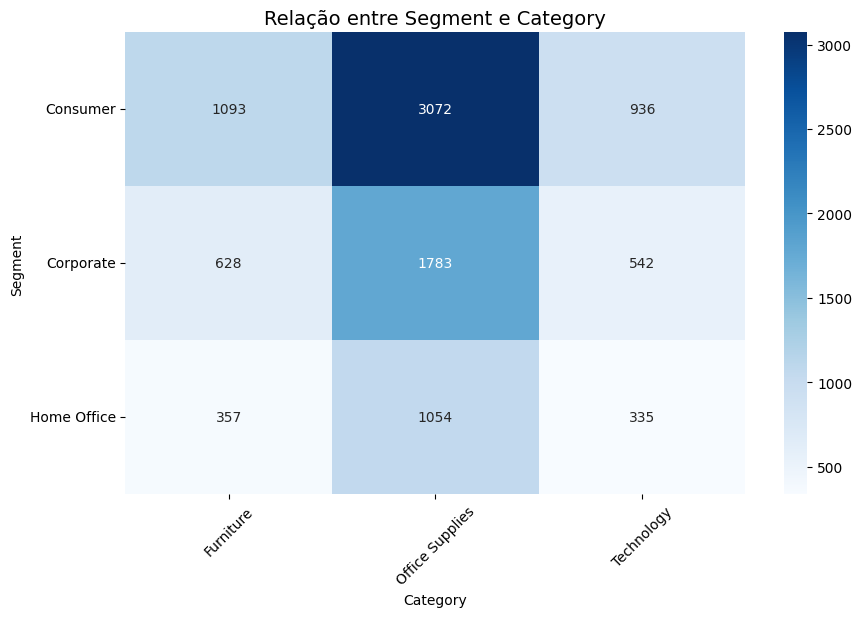

In [ ]:
cross_tab = pd.crosstab(df['Segment'], df['Category'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Segment e Category', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

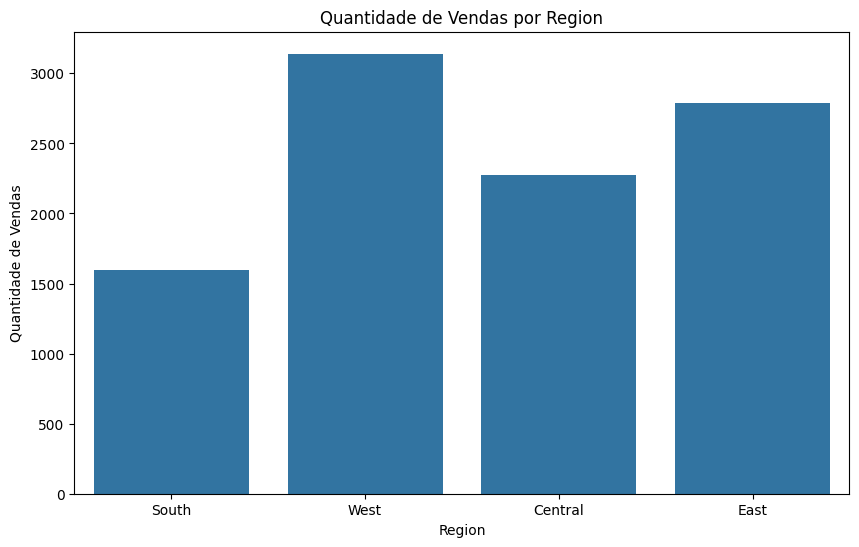

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=df)
plt.title('Quantidade de Vendas por Region')
plt.xlabel('Region')
plt.ylabel('Quantidade de Vendas')
plt.show()

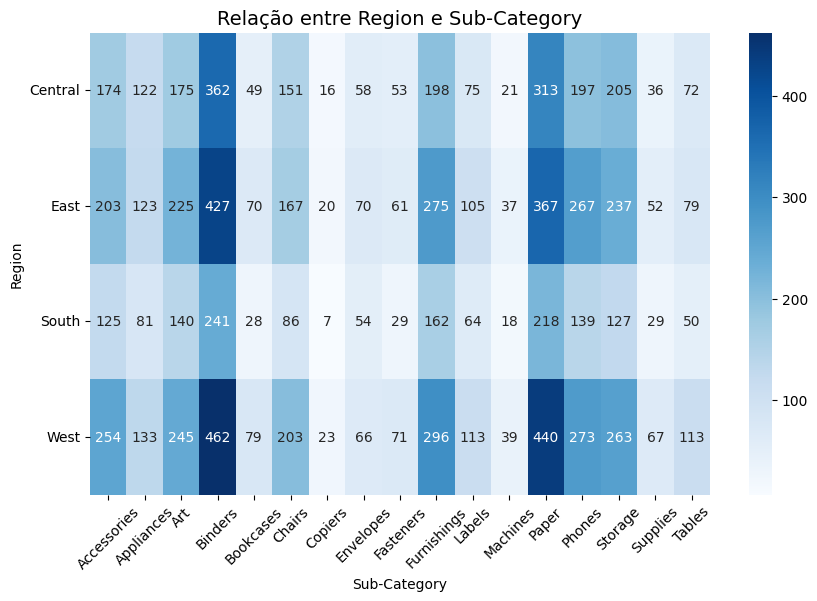

In [ ]:
cross_tab = pd.crosstab(df['Region'], df['Sub-Category'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')

plt.title('Relação entre Region e Sub-Category', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
def mesesVenda(coluna):
    data_formatada = datetime.strptime(coluna, "%d/%m/%Y")

    mes = data_formatada.month
    return mes

In [ ]:
mesVend = df['Order Date'].apply(mesesVenda)

df['Mes Venda'] = mesVend

In [ ]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Dias Entrega,Mes Venda
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,11
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,11
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,6


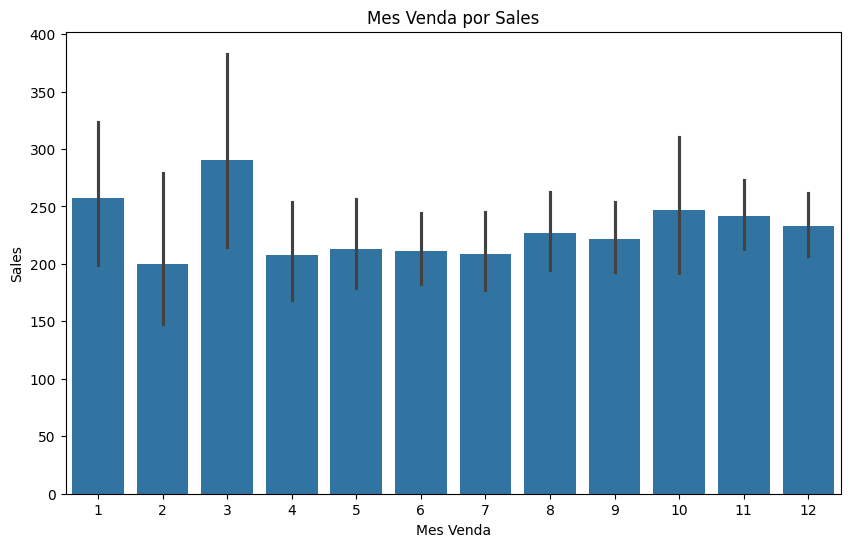

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Mes Venda', y='Sales', data=df)
plt.title('Mes Venda por Sales')
plt.xlabel('Mes Venda')
plt.ylabel('Sales')
plt.show()

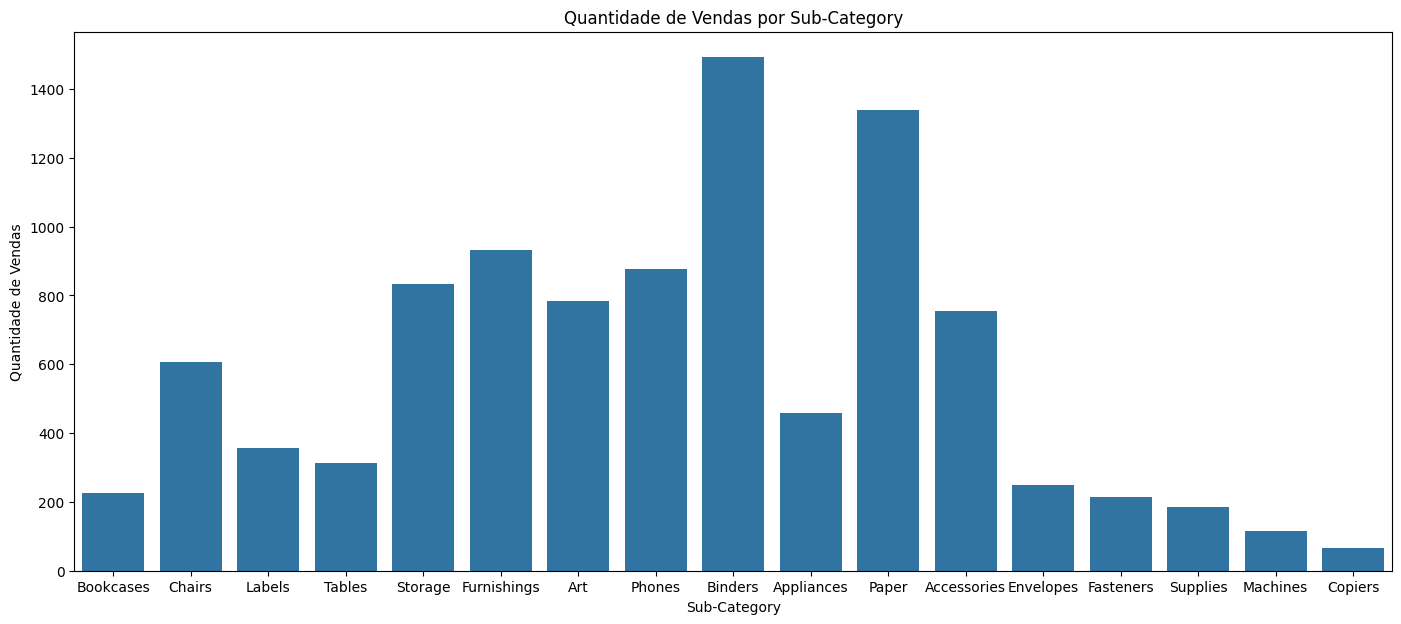

In [ ]:
plt.figure(figsize=(17,7))
sns.countplot(x='Sub-Category', data=df)
plt.title('Quantidade de Vendas por Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Quantidade de Vendas')
plt.show()

In [ ]:
mediana(df , 'Sub-Category' , 'Sales')

 o nome Accessories têm a média de valor de: 100.00
 o nome Appliances têm a média de valor de: 83.42
 o nome Art têm a média de valor de: 15.48
 o nome Binders têm a média de valor de: 18.52
 o nome Bookcases têm a média de valor de: 304.46
 o nome Chairs têm a média de valor de: 359.77
 o nome Copiers têm a média de valor de: 1099.98
 o nome Envelopes têm a média de valor de: 28.58
 o nome Fasteners têm a média de valor de: 10.58
 o nome Furnishings têm a média de valor de: 41.96
 o nome Labels têm a média de valor de: 14.94
 o nome Machines têm a média de valor de: 599.99
 o nome Paper têm a média de valor de: 26.72
 o nome Phones têm a média de valor de: 210.87
 o nome Storage têm a média de valor de: 112.62
 o nome Supplies têm a média de valor de: 27.64
 o nome Tables têm a média de valor de: 450.39
 o nome que têm a maior média e/são : {'Accessories': 100.0, 'Bookcases': 304.45725, 'Chairs': 359.772, 'Copiers': 1099.98}
